In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import time
tag= 'tmp' + str(int(time.time()))

### Choix de la dynamique de la synapse (fonction de decay)

Les modèles de neurones ``IFcondexp`` et ``IFcondalpha`` sont ici à nouveau comparés, dans le cadre du RRNN cette fois. Le but est d'éviter d'avoir un réseau qui sature trop facilement afin que les manipulations effectuées aient un effet observable.
Les paramètres de taux de décharge d'entrée et de poids de l'entrée sont manipulés. Comme cela a pu être effectué précédemment, pour chacun de ces paramètres, le taux de décharge moyen des neurones du réseau est récupéré et une courbe est générée.

Le rapport F/I est plus important pour un decay en alpha function. Afin d'éviter des saturations de l'activité du réseau et compte tenu des résultats obtenus avec les deux types de neurones, je choisis de conserver l'IF cond exp.

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH
------------  input_rate  -------------


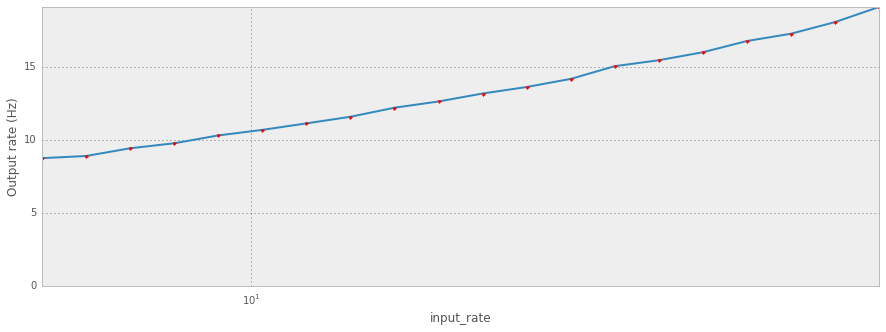

------------  w_input_exc  -------------


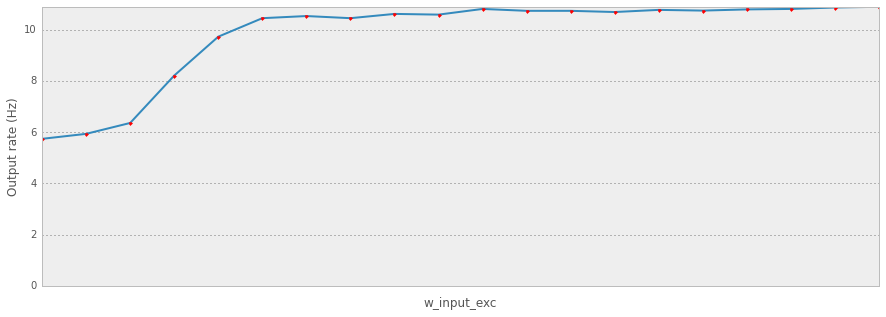

In [2]:
import numpy as np
from RRNN import RRNN

net = RRNN(ring=False, recurrent=False)

datapath_exp = '/tmp/OB-V1_data/cond_exp' + tag

n_sim_each = 20

sim_list = [
            ('input_rate' , net.sim_params['input_rate']*np.logspace(-.1, .3, n_sim_each)),
            ('w_input_exc', net.sim_params['w_input_exc']*np.logspace(-.3, .3, n_sim_each)),
]

net.paramRole(sim_list, datapath=datapath_exp, f_rate_max=None)

------------  input_rate  -------------


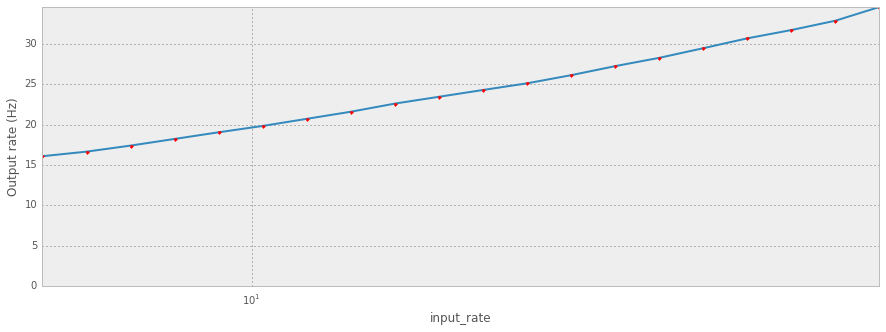

------------  w_input_exc  -------------


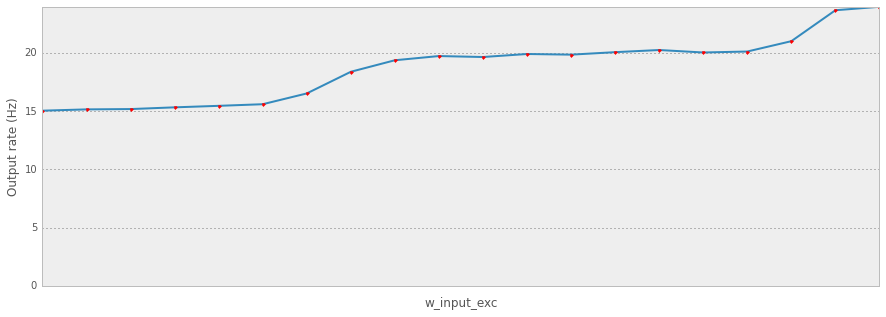

In [3]:
net = RRNN(ring=False, recurrent=False)
net.sim_params['neuron_model'] = 'cond_alpha'
datapath_alpha = '/tmp/OB-V1_data/cond_alpha' + tag
net.paramRole(sim_list, datapath=datapath_alpha, f_rate_max=None)